In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CLEANED dataset
file_path = 'D:/PROJECTS/CreditGuard/data/heloc_dataset_processed.csv'
df = pd.read_csv(file_path)

# --- Separate Features (X) and Target (y) ---
# X contains all columns EXCEPT the one we want to predict ('RiskPerformance')
X = df.drop('RiskPerformance', axis=1)

# y contains ONLY the column we want to predict
y = df['RiskPerformance']

# --- Split Data into Training and Testing Sets ---
# We'll use 80% of the data to train the model and 20% to test its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully loaded and split.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data successfully loaded and split.
Training set shape: (8367, 23)
Testing set shape: (2092, 23)


In [3]:
# --- DIAGNOSTIC CELL ---
# Check the distribution of the target variable in the loaded dataframe
print("Distribution of 'RiskPerformance' in the loaded data:")
print(df['RiskPerformance'].value_counts())

Distribution of 'RiskPerformance' in the loaded data:
RiskPerformance
1    5459
0    5000
Name: count, dtype: int64


In [4]:
# --- Train the Logistic Regression Model ---

# Create the model instance
# max_iter=1000 ensures the model has enough iterations to find the best solution
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.7132

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.69      0.73      0.71      1000
     Bad (1)       0.74      0.70      0.72      1092

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092


Confusion Matrix:


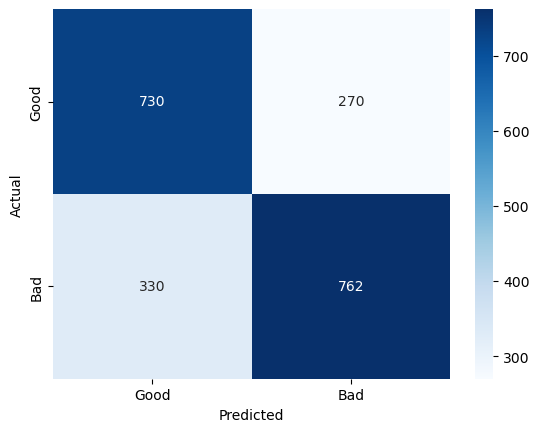

In [5]:
# --- Evaluate the Model ---

# Make predictions on the unseen test data
y_pred = log_reg_model.predict(X_test)

# --- Performance Metrics ---

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Good (0)', 'Bad (1)']))

# 3. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# --- Step 1: Train and Evaluate an SVM Model ---
from sklearn.svm import SVC

# Create the SVM model instance
# The 'rbf' kernel is great for finding complex patterns
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
print("Training the SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model trained successfully!")

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance
print("\n--- SVM Performance ---")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Good (0)', 'Bad (1)']))

Training the SVM model...
SVM model trained successfully!

--- SVM Performance ---
SVM Accuracy: 0.7103

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.69      0.70      0.70      1000
     Bad (1)       0.73      0.72      0.72      1092

    accuracy                           0.71      2092
   macro avg       0.71      0.71      0.71      2092
weighted avg       0.71      0.71      0.71      2092



In [7]:
# --- Step 2: Train and Evaluate a Random Forest Model ---
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model instance
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance
print("\n--- Random Forest Performance ---")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Good (0)', 'Bad (1)']))

Training the Random Forest model...
Random Forest model trained successfully!

--- Random Forest Performance ---
Random Forest Accuracy: 0.7165

Classification Report:
              precision    recall  f1-score   support

    Good (0)       0.72      0.66      0.69      1000
     Bad (1)       0.71      0.77      0.74      1092

    accuracy                           0.72      2092
   macro avg       0.72      0.71      0.71      2092
weighted avg       0.72      0.72      0.72      2092



In [8]:
from sklearn.model_selection import cross_val_score

# --- Robust Evaluation with 5-Fold Cross-Validation ---

# We will use our entire dataset (X, y) for this, as cross-validation handles splitting internally.

# 1. Cross-validate Logistic Regression
print("Cross-validating Logistic Regression...")
cv_scores_log_reg = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracies: {cv_scores_log_reg}")
print(f"Average CV Accuracy: {cv_scores_log_reg.mean():.4f}\n")

# 2. Cross-validate SVM
print("Cross-validating SVM...")
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print(f"SVM CV Accuracies: {cv_scores_svm}")
print(f"Average CV Accuracy: {cv_scores_svm.mean():.4f}\n")

# 3. Cross-validate Random Forest
print("Cross-validating Random Forest...")
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracies: {cv_scores_rf}")
print(f"Average CV Accuracy: {cv_scores_rf.mean():.4f}\n")

Cross-validating Logistic Regression...


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression CV Accuracies: [0.64674952 0.71701721 0.72609943 0.69885277 0.73935916]
Average CV Accuracy: 0.7056

Cross-validating SVM...
SVM CV Accuracies: [0.64292543 0.72466539 0.72179732 0.70028681 0.75322812]
Average CV Accuracy: 0.7086

Cross-validating Random Forest...
Random Forest CV Accuracies: [0.63001912 0.72131931 0.72179732 0.70458891 0.73457676]
Average CV Accuracy: 0.7025



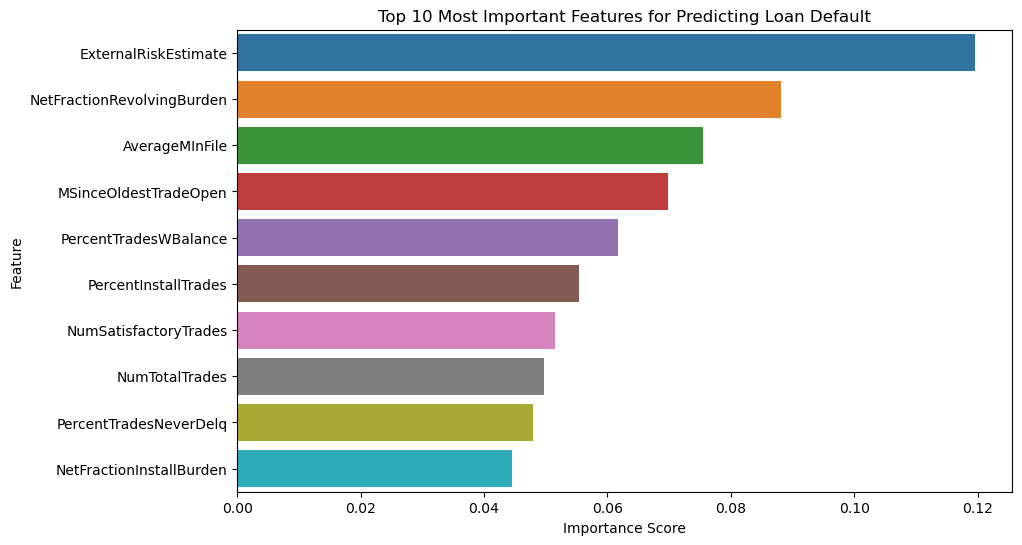

In [9]:
# --- Feature Importance from Random Forest ---

# Get the importance scores from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Loan Default')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# --- Step 1: Apply PCA ---

# Although our data is already scaled, it's best practice to re-scale
# the data you're feeding into a new pipeline.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# We'll start by keeping enough components to explain 95% of the variance.
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after PCA: {pca.n_components_}")

Original number of features: 23
Number of features after PCA: 16


In [ ]:
# --- Step 2: Retrain Models on PCA Data ---

# 1. Cross-validate Logistic Regression on PCA data
print("Cross-validating Logistic Regression with PCA...")
cv_scores_log_reg_pca = cross_val_score(log_reg_model, X_pca, y, cv=5, scoring='accuracy')
print(f"Average CV Accuracy with PCA: {cv_scores_log_reg_pca.mean():.4f}\n")

# 2. Cross-validate SVM on PCA data
print("Cross-validating SVM with PCA...")
cv_scores_svm_pca = cross_val_score(svm_model, X_pca, y, cv=5, scoring='accuracy')
print(f"Average CV Accuracy with PCA: {cv_scores_svm_pca.mean():.4f}\n")

# 3. Cross-validate Random Forest on PCA data
print("Cross-validating Random Forest with PCA...")
cv_scores_rf_pca = cross_val_score(rf_model, X_pca, y, cv=5, scoring='accuracy')
print(f"Average CV Accuracy with PCA: {cv_scores_rf_pca.mean():.4f}\n")

Cross-validating Logistic Regression with PCA...
Average CV Accuracy with PCA: 0.7204

Cross-validating SVM with PCA...
Average CV Accuracy with PCA: 0.7045

Cross-validating Random Forest with PCA...


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Step 1: Set up the Hyperparameter Grid Search ---

# 1. Define the model we want to tune
# Note: We create a new instance here
model_to_tune = LogisticRegression(max_iter=1000, random_state=42)

# 2. Define the settings (hyperparameters) we want to test
# We'll test a range of values for the regularization parameter 'C'
# We'll also test two different algorithms ('solver') for finding the solution
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# 3. Set up the Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_to_tune,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,  # This will print progress updates
                           n_jobs=-1) # Use all available CPU cores

In [ ]:
# --- Step 2: Run the Grid Search on PCA Data ---

print("Starting hyperparameter tuning...")
# We use the PCA-transformed data (X_pca) as it gave the best results
grid_search.fit(X_pca, y)
print("Tuning complete!")

# --- Step 3: View the Best Results ---

print("\nBest hyperparameters found:")
print(grid_search.best_params_)

print(f"\nBest cross-validated accuracy score: {grid_search.best_score_:.4f}")

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# --- Step 1: Create and Train the Final Model Pipeline ---

# 1. Define the steps in the pipeline
#    Step 1: Scale the data
#    Step 2: Apply PCA
#    Step 3: Train the final, tuned Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('model', LogisticRegression(C=0.001, solver='saga', max_iter=1000, random_state=42))
])

# 2. Train the entire pipeline on the FULL dataset
#    We use all the data now because we're preparing the final production model
pipeline.fit(X, y)

print("Final model pipeline trained successfully!")

# --- Step 2: Save the Pipeline ---

# Save the entire pipeline object to a file
joblib.dump(pipeline, 'D:\PROJECTS\CreditGuard\saved_models\credit_risk_pipeline.joblib')
print("\nPipeline saved successfully as 'credit_risk_pipeline.joblib'")